In [37]:
#import the Random Forest Model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pickle import dump, load
import pandas as pd
import numpy as np
import os


In [3]:
# Set file path to the cleaned data csv from data cleanup process
file = "data.csv"

# Read to a df
data_df = pd.read_csv(file)
# data_df.head()

In [4]:
# Load the Iris Dataset
iris = load_iris()
# print (iris.DESCR)

In [5]:
#set the target varible
#column with the correct answser
X = data_df.drop("income", axis=1)
y = data_df["income"]
# target_names= [">=50","<=50"]
print(X.shape, y.shape)


(32561, 14) (32561,)


In [9]:
#set the seature names to the column header
feature_names = data_df.columns
data_df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#binary encode the fields
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#import train_test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train[0]

' <=50K'

In [ ]:
X_test

In [12]:
#import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.8581255374032674

           As we can see the RandomForestClassifier has about 86% of accuracy. This is a very good indicator of a good model. On the next steps, we will prioritize the features based on the importance in order to investigate which feature was the greatest indicator of income that is 
           above 50,000 dollars or below 50,000 dollars. 

In [13]:
#save as csv and use it for input demo
# input_testdata = X_test.loc[14160].to_frame()

#user input example
input_test_1 = X_test.loc[14160]
input_test_2 = X_test.loc[30339]
input_test_3 = X_test.loc[8610]

In [14]:
#array for the reshape
input_test_1 = [np.array(input_test_1)]
input_test_2 = [np.array(input_test_2)]
input_test_3 = [np.array(input_test_3)]

In [15]:
#check to see if the input values as an array
#input_test_1
#input_test_2
input_test_3

[array([    24, 322931,      4,      0,   1902,     40,      0,      0,
             0,      0,      0,      0,      1,      0,      0,      0,
             0,      0,      0,      0,      1,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      1,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      1,      1,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      1,
             0,      1,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      1,      0,      0])]

In [16]:
#predict input options 1-3
predction = rf.predict(input_test_3)
predction

array([' <=50K'], dtype=object)

In [17]:
#predict input options 1-3
predction = rf.predict(input_test_3)
predction

array([' <=50K'], dtype=object)

In [18]:
featuresPriority = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [20]:
featuresPriority

[(0.15749844579610014, 'workclass'),
 (0.14957967610432663, 'age'),
 (0.09141464749598623, 'education'),
 (0.08290836606908292, 'marital_status'),
 (0.06504101682658199, 'fnlwgt'),
 (0.02912690504558779, 'education_number'),
 (0.011049186500726909, 'capital_gain'),
 (0.00883651975367449, 'hours_per_week'),
 (0.00649194322954368, 'capital_loss'),
 (0.006217137689882025, 'race'),
 (0.005715413160569004, 'relationship'),
 (0.004628325820340798, 'native_country'),
 (0.0019953058047419772, 'occupation'),
 (2.4537988839249837e-06, 'sex')]

In [21]:
featuresPriority
labels = []
values = []

for i in range(0, len(featuresPriority)): 
       values.append(featuresPriority[i][0])
       labels.append(featuresPriority[i][1])


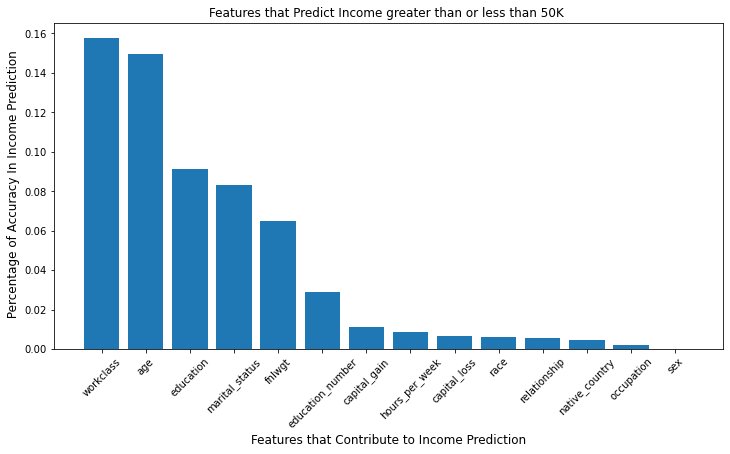

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize= (12,6))
ax.bar(labels, values)
plt.xticks(rotation = 45)
plt.ylabel(" Percentage of Accuracy In Income Prediction",  fontsize=12)
plt.xlabel("Features that Contribute to Income Prediction",  fontsize=12)
plt.title ("Features that Predict Income greater than or less than 50K ")

plt.show()






#plt.bar(x = labels, height=values)

In [23]:
#X is the data binaryencoded
X

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Define the scaling function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
# Fit the scaling function to the training set
scaler.fit(X_train)

StandardScaler()

In [29]:
# Transform the training set
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.76270329,  0.03505025, -0.42318329, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       [-0.85041534, -0.52773408, -0.42318329, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       [ 0.39608542, -0.18721601, -1.20001078, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       ...,
       [-1.51032751,  0.25286853, -1.20001078, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       [ 0.83602687, -1.28703767, -0.42318329, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       [-0.33715032, -0.58952117,  1.13047168, ...,  0.3446706 ,
        -0.04921284, -0.022173  ]])

In [30]:
# Define the label encoder and fit it to the training set
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

In [32]:
# Transform the labels of the training set
y_train_encoded = label_encoder.transform(y_train)
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# Define the model
randomforest = RandomForestClassifier()

In [34]:
# Fit the model to the scaled / encoded training set
randomforest.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier()

In [38]:
# Save the model to a pickle file (i.e., "pickle it")
# so we can use it from the Flask server. 
dump(randomforest, open('randomforest.pkl', 'wb'))



In [39]:
# Save the scaling function to a pickle file (i.e., "pickle it")
# so we can use it from the Flask server. 
dump(scaler, open('scaler.pkl', 'wb'))

In [40]:
prediction_labels = [">=50","<=50"]

In [41]:
# Load the model.
randomforest = load(open('randomforest.pkl', 'rb'))

In [42]:
# Load the scaler.
scaler = load(open('scaler.pkl', 'rb'))

In [49]:
input_row1 = input_test_1
input_row2 = input_test_2


In [50]:
input_row1_scaled = scaler.transform(input_row1)
input_row2_scaled = scaler.transform(input_row2)

In [51]:
predict = randomforest.predict(input_row2_scaled)
print(f'Prediction 1 is: {prediction_labels[predict[0]]}')

Prediction 1 is: <=50
